In [1]:
%pip install pygraphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch_geometric

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip uninstall -y numpy

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install numpy==1.24.4

  Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
print(np.__version__)


1.24.4


In [1]:
from graph import Graph
from graph_nca import GraphNCA

/home/pakhi/Documents/gsoc/gsoc-2024/ndp/env/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
NUM_OPERATIONS = 3
NUM_ACTIVATIONS = 2
NUM_HIDDEN_CHANNELS = 3

NUM_CHANNELS = GraphNCA.get_number_of_channels(NUM_OPERATIONS, NUM_ACTIVATIONS, NUM_HIDDEN_CHANNELS)

In [3]:
NUM_CHANNELS

3

edgelist [(0, 1)]
tensor([[0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.5000]])


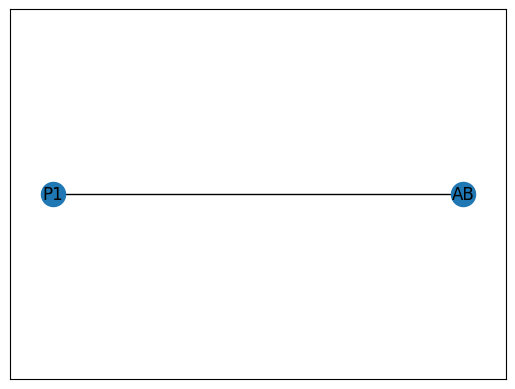

In [4]:
import torch
import numpy as np
import pandas as pd

x = torch.randn((2, NUM_HIDDEN_CHANNELS))
x[0,0] = 0
x[0,1] = 0
x[0,2] = 0
x[1,0] = 0.5
x[1,1] = 0.5
x[1,2] = 0.5


edge_dict = {0:[1]}
label_dict = {0:"P1", 1:"AB"}
# edge_dict = {0:[2,3], 1:[2,3], 2:[], 3:[2], 4:[3,1], 5:[4,3], 6:[5,4], 7:[6,3], 8:[2,5,7], 9:[7,8,6]}
# x = torch.randn((6, NUM_CHANNELS))
# edge_dict = {0:[2, 4], 1:[2, 3, 4], 4:[5], 5:[2, 3], 2:[], 3:[]}

# pos_path = pd.read_csv('/home/pakhi/Documents/gsoc/gsoc-2024/Growing-GNNs/developmental-cells-and-position.csv')

graph = Graph(x, edge_dict, label_dict)
image = graph.plot()
print(graph.nodes)

In [5]:
import torch.distributions as td

def loss_fn(logits, actions, rewards):
    categorical = td.categorical.Categorical(logits=logits)
    log_probs = -categorical.log_prob(actions)
    return torch.sum(rewards*log_probs)

In [6]:
nca = GraphNCA(graph, NUM_HIDDEN_CHANNELS)
optimizer = torch.optim.Adam(nca.parameters(), lr=0.001)

In [7]:
list(nca.parameters())

[Parameter containing:
 tensor([[-0.2036,  0.0814,  0.6564],
         [-0.3437,  0.2909,  0.3467],
         [-0.6134, -0.6075,  0.3934],
         [-0.2470,  0.6332, -0.6461],
         [ 0.4918,  0.4305,  0.6179],
         [ 0.1295,  0.6461,  0.5772],
         [ 0.5929,  0.0713,  0.4772],
         [-0.1818,  0.6328,  0.1161],
         [-0.5719,  0.3904,  0.3104]], requires_grad=True),
 Parameter containing:
 tensor([[-1.5135e-01, -1.0366e-01, -2.6094e-01, -2.4141e-01, -1.5476e-01,
          -3.1700e-01,  2.9172e-02, -2.0382e-01, -2.7500e-01],
         [ 1.9670e-01, -1.7954e-02,  1.1232e-01, -1.0749e-01,  1.5254e-01,
          -3.0337e-01, -1.8513e-01, -2.7461e-01, -2.7100e-01],
         [-1.6933e-01,  7.0122e-02,  1.5710e-01,  2.2556e-01,  1.8443e-01,
          -3.0415e-01,  6.1898e-02, -5.1420e-02,  3.1818e-01],
         [ 1.6141e-01, -4.4280e-02,  1.4993e-01, -3.6229e-02,  6.2929e-02,
          -2.1273e-01,  3.7737e-03, -1.3887e-01, -1.7684e-01],
         [ 2.1843e-01, -2.5586e-01,  1

In [8]:
print(nca.graph.to_data())

Data(x=[2, 3], edge_index=[2, 1], edge_attr=[1])


In [9]:
list(nca.parameters())

[Parameter containing:
 tensor([[-0.2036,  0.0814,  0.6564],
         [-0.3437,  0.2909,  0.3467],
         [-0.6134, -0.6075,  0.3934],
         [-0.2470,  0.6332, -0.6461],
         [ 0.4918,  0.4305,  0.6179],
         [ 0.1295,  0.6461,  0.5772],
         [ 0.5929,  0.0713,  0.4772],
         [-0.1818,  0.6328,  0.1161],
         [-0.5719,  0.3904,  0.3104]], requires_grad=True),
 Parameter containing:
 tensor([[-1.5135e-01, -1.0366e-01, -2.6094e-01, -2.4141e-01, -1.5476e-01,
          -3.1700e-01,  2.9172e-02, -2.0382e-01, -2.7500e-01],
         [ 1.9670e-01, -1.7954e-02,  1.1232e-01, -1.0749e-01,  1.5254e-01,
          -3.0337e-01, -1.8513e-01, -2.7461e-01, -2.7100e-01],
         [-1.6933e-01,  7.0122e-02,  1.5710e-01,  2.2556e-01,  1.8443e-01,
          -3.0415e-01,  6.1898e-02, -5.1420e-02,  3.1818e-01],
         [ 1.6141e-01, -4.4280e-02,  1.4993e-01, -3.6229e-02,  6.2929e-02,
          -2.1273e-01,  3.7737e-03, -1.3887e-01, -1.7684e-01],
         [ 2.1843e-01, -2.5586e-01,  1

: 

In [10]:
# OG


from matplotlib import pyplot as plt
# from celluloid import Camera
# from IPython.display import HTML
import pandas as pd
import numpy as np

# fig = plt.figure()
# camera = Camera(fig)

# images = []
# img = graph.plot(fig=fig)
# fig.clear()
# images.append(img)
# for i in range(10):
    # print("ini graph",graph.nodes.size())
    # graph = nca.grow(graph = graph, parent_index=i)
    # print("returned graph",graph.nodes.size())
    # print("------")
    # img = graph.plot(fig=fig) 
    # # camera.snap()
    # fig.clear()
    # images.append(img)
# print(f"Size of graph.labels: {len(graph.labels)}")
# print(f"Size of graph.edge_index: {graph.edge_dict.size()}")

# if graph.edge_index.size(0) == 0:
#     raise ValueError("graph.edge_index is empty. Cannot proceed with the growth process.")


cells_data = pd.read_csv('/home/pakhi/Documents/gsoc/gsoc-2024/Growing-GNNs/merged_common_cells.csv')

fig = plt.figure()

images = []
plt.text(0.1, 0.9, 'Time: Initial', transform=fig.transFigure, fontsize=12, color='red')
fig.canvas.draw()
images.append(np.array(fig.canvas.renderer.buffer_rgba()))
fig.clear()

for time_stamp in sorted(cells_data['Birth Time'].unique()):
# for time_stamp in range(0, 50):
    # Filter rows with the current birth time
    rows_at_time = cells_data[cells_data['Birth Time'] == time_stamp]
    
    # Iterate through these rows
    for _, row in rows_at_time.iterrows():
        if row['Parent Cell'] not in graph.labels.values():
            continue
        parent = row['Parent Cell']
        daughter1 = row['Daughter 1']
        daughter2 = row['Daughter 2']
        # print(parent, daughter1, daughter2)
        parent_index = list(graph.labels.keys())[list(graph.labels.values()).index(parent)]
        # print("parent:", parent, parent_index)
        # print("labels",graph.labels)
        
        graph, updated_nodes = nca.grow(graph, parent_index, [daughter1, daughter2])
        # print("daughters", daughter1, daughter2, "parent", parent)    
        # print("updated nodes", updated_nodes)
        # print("labels",graph.labels)
        daughter1_index = list(graph.labels.keys())[list(graph.labels.values()).index(daughter1)]
        daughter2_index = list(graph.labels.keys())[list(graph.labels.values()).index(daughter2)]
        #list all cell names in graph
        
        # print node embeddings of every cell
        # print("Node embeddings of every cell", graph.nodes)
        
        print("------------------")
        # print(f"Daughter 1 Index: {daughter1_index}, Daughter 2 Index: {daughter2_index}")
        
        # graph = nca.optimize_positions(graph, daughter1, daughter2, updated_nodes)
        daughter_pair = [daughter1, daughter2]
        nca.optimize_with_cma_es(graph, parent_index, daughter_pair)

    img = graph.plot(fig=fig)
    plt.text(0.1, 0.9, f'Time: {time_stamp}', transform=fig.transFigure, fontsize=12, color='red')
    fig.canvas.draw()
    images.append(np.array(fig.canvas.renderer.buffer_rgba()))
    fig.clear()


edgelist [(0, 1)]
parent: 1, daughters: 1, 2
D1: [2]
D2: [1]
Node: 0, Connections: [1, 2]
Node: 1, Connections: [2]
Node: 2, Connections: []
------------------
(11_w,23)-aCMA-ES (mu_w=6.7,w_1=25%) in dimension 772 (seed=562330, Sun Sep 15 20:50:16 2024)
edgelist [(0, 1), (0, 2), (1, 2)]
parent: 0, daughters: 0, 3
D1: [3, 1, 2]
D2: [0, 1, 2]
Node: 1, Connections: [2]
Node: 2, Connections: []
Node: 0, Connections: [3, 1, 2]
Node: 3, Connections: [1, 2]
------------------
(11_w,23)-aCMA-ES (mu_w=6.7,w_1=25%) in dimension 772 (seed=542074, Sun Sep 15 20:50:17 2024)
edgelist [(1, 2), (0, 3), (0, 1), (0, 2), (3, 1), (3, 2)]
parent: 1, daughters: 1, 4
D1: [4, 2]
D2: [1, 2]
Node: 2, Connections: []
Node: 0, Connections: [3, 2, 1, 4]
Node: 3, Connections: [2, 1, 4]
Node: 1, Connections: [4, 2]
Node: 4, Connections: [2]
------------------
(11_w,23)-aCMA-ES (mu_w=6.7,w_1=25%) in dimension 772 (seed=522637, Sun Sep 15 20:50:18 2024)
parent: 2, daughters: 2, 5
D1: [5]
D2: [2]
Node: 0, Connections: 

In [1]:
from PIL import Image

In [2]:
imgs = [Image.fromarray(img) for img in images]


NameError: name 'images' is not defined

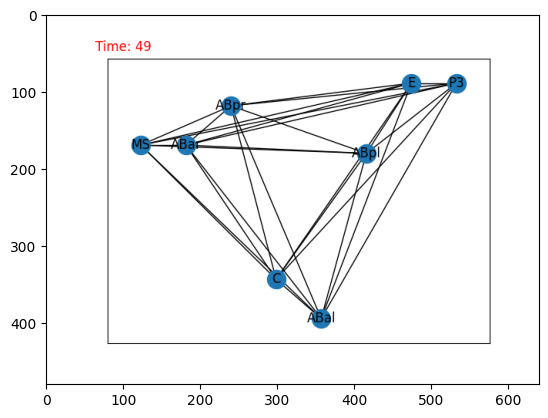

In [ ]:
plt.imshow(images[-1])

In [ ]:
Image.fromarray(images[1]).save("next_step.png")

In [ ]:
# imgs[0].save("array3.gif", save_all=True, append_images=imgs[1:], duration=1000, loop=0)

In [ ]:
imgs[0].save("array2.gif", save_all=True, append_images=imgs[1:], duration=1000, loop=0)

In [ ]:
HTML(animation.to_html5_video())


NameError: name 'HTML' is not defined

In [ ]:
generated_network = GeneratedNetwork(graph)

In [ ]:
generated_network(torch.ones(2))[graph.output_nodes]

#### RL

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from typing import Any, Dict, Optional, Callable
import torch.distributions as td
import numpy as np
import gym

In [ ]:
# from ezrl.optimizer import RLOptimizer
# from ezrl.policy import GymPolicy
# from ezrl.algorithms.reinforce import ReinforceOptimizer

In [ ]:
from growing_nn.graph.directed_graph import DirectedGraph
from growing_nn.graph.graph_nca import GraphNCA
from growing_nn.graph.generated_network import GeneratedNetwork
from ezrl.optimizer import RLOptimizer
from ezrl.policy import GymPolicy
from ezrl.algorithms.reinforce import ReinforceOptimizer

In [ ]:
env = gym.make("LunarLander-v2")

In [ ]:
def reinforce_rollout(
    policy: GymPolicy, env_name: str = None, env=None, env_creation_fn=None
):
    if env_name is None and env is None:
        raise ValueError("env_name or env must be provided!")
    if env is None:
        if env_creation_fn is None:
            env_creation_fn = gym.make
        env = env_creation_fn(env_name)
    done = False
    observations, actions, rewards = (
        [],
        [],
        [],
    )
    observation = env.reset()
    with torch.no_grad():
        generated_network = policy.generate_network(policy.num_growth_steps)
        while not done:
            action, out = policy.act(
                torch.from_numpy(observation).unsqueeze(0).to(policy.device), generated_network
            )
            next_observation, reward, done, info = env.step(action)

            observations.append(observation)
            actions.append(action)
            rewards.append(reward)

            observation = next_observation

    return np.array(observations), np.array(actions), np.array(rewards)


In [ ]:
from torch.utils.tensorboard import SummaryWriter
import os
from datetime import datetime

def get_tensorboard_logger(experiment_name: str, base_log_path: str = "tensorboard_logs"):
    log_path = "{}/{}_{}".format(
            base_log_path, experiment_name, datetime.now()
        )
    train_writer = SummaryWriter(log_path, flush_secs=10)
    full_log_path = os.path.join(os.getcwd(), log_path)
    print(
        "Follow tensorboard logs with: tensorboard --logdir '{}'".format(
            full_log_path
        )
    )
    return train_writer

In [ ]:
NUM_OPERATIONS = 3
NUM_ACTIVATIONS = 2
NUM_HIDDEN_CHANNELS = 24

NUM_CHANNELS = GraphNCA.get_number_of_channels(NUM_OPERATIONS, NUM_ACTIVATIONS, NUM_HIDDEN_CHANNELS)

In [ ]:
def make_inital_graph(num_inputs, num_outputs, device):
    x = torch.ones((num_inputs + num_outputs, NUM_CHANNELS), device=device)
    edge_dict = {}
    for i in range(num_inputs):
        edge_dict[i] = list(range(num_inputs, num_inputs+num_outputs))
    for i in range(num_inputs, num_inputs+num_outputs):
        edge_dict[i] = []
    return Graph(x, edge_dict, num_inputs, num_outputs)

In [ ]:
device = torch.device('cuda')

graph = make_inital_graph(8, 4, device)

In [ ]:
image = graph.plot()

In [ ]:
graph.nodes

In [ ]:
nca = GraphNCA(graph, NUM_HIDDEN_CHANNELS)

In [ ]:
from tqdm import tqdm


policy = LunarLanderNCAPolicy(nca,num_growth_steps=16)
policy = policy.to(device)

In [ ]:
bar = tqdm(np.arange(50000))

writer = get_tensorboard_logger("ReinforceLunarLander")
optimizer = ReinforceOptimizer(policy, lr=0.001)

for i in bar:
    observations, actions, rewards = optimizer.rollout(reinforce_rollout, env_name = "LunarLander-v2")

    torch_observations = torch.from_numpy(observations).to(policy.device)
    torch_actions = torch.from_numpy(actions).float().to(policy.device)
    torch_rewards = torch.from_numpy(rewards).float().to(policy.device)


    optimizer.zero_grad()
    loss = optimizer.loss_fn(torch_observations, torch_actions, torch_rewards)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy.parameters(), 10.0)
    optimizer.step()

    # metrics

    grad_dict = {}
    for n, W in policy.named_parameters():
        if W.grad is not None:
            grad_dict["{}_grad".format(n)] = float(torch.sum(W.grad).item())

    loss = loss.item()
    sum_reward = np.sum(rewards)

    metrics_dict = {"loss":loss, "sum_reward":sum_reward, **grad_dict}

    for key in metrics_dict:
        writer.add_scalar(key, metrics_dict[key], i)


    bar.set_description("Loss: {}, Reward: {}".format(loss, sum_reward))